## Logistic Regression Basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv('LogisticData.csv')
raw_data.head()

SAT Admitted  Gender
0  1363       No    Male
1  1792      Yes  Female
2  1954      Yes  Female
3  1653       No    Male
4  1593       No    Male

In [3]:
raw_data = raw_data.copy()
raw_data['Admitted'] = raw_data['Admitted'].map({'Yes': 1, 'No': 0})
raw_data['Gender'] = raw_data['Gender'].map({'Female': 1, 'Male': 0})
raw_data.head()

SAT  Admitted  Gender
0  1363         0       0
1  1792         1       1
2  1954         1       1
3  1653         0       0
4  1593         0       0

## EDA

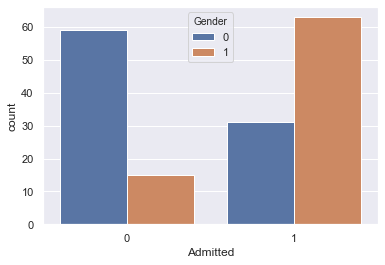

In [4]:
sns.countplot(raw_data['Admitted'], hue = raw_data['Gender'])

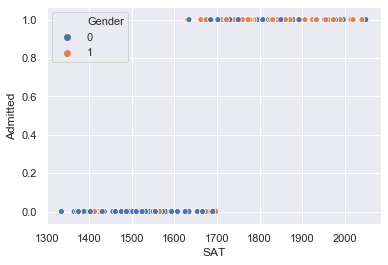

In [5]:
sns.scatterplot(raw_data['SAT'],raw_data['Admitted'], hue = raw_data['Gender'])

## Declare the dependent and the independent variables

In [8]:
y = raw_data['Admitted']
x1 = raw_data[['SAT','Gender']]

In [9]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(x1,y,test_size=0.2, random_state = 200)

## Logistic Regression

In [10]:
#Import libraries
from sklearn.linear_model import LogisticRegression

In [11]:
#Build model
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit( X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
logreg.score(X_test,y_test)

0.9705882352941176

In [13]:
t_predictions = logreg.predict(X_test)
t_predictions

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

Text(0, 0.5, 'Admitted')

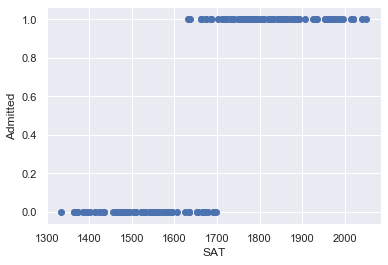

In [14]:
plt.scatter(raw_data['SAT'],raw_data['Admitted'])
plt.xlabel("SAT")
plt.ylabel("Admitted")

## Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,t_predictions))

## Prediction on Unseen/new Data 

In [ ]:
new_data = pd.read_csv('NewSet_wo_Admitted.csv')
new_data.head()

In [ ]:
new_data['Gender'] = new_data['Gender'].map({'Female': 1, 'Male': 0})
new_data.head()

In [ ]:
new_predictions = logreg.predict(new_data)
new_predictions

In [ ]:
# Generate Submission File 
Check = pd.DataFrame({ 'SAT': new_data['SAT'],
                            'Gender': new_data['Gender'], 
                     'Admitted_Pred': new_predictions})
Check.to_csv("Check.csv", index=False)